<a href="https://www.kaggle.com/code/yunasheng/text-to-image?scriptVersionId=162284722" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

When you think of diffusion models, text-to-image is usually one of the first things that come to mind. Text-to-image generates an image from a text description(for example,"Astronaut in a jungle, cold color palette, mutes colors, detailed, 8k") whih is also known as a prompt.

From a very high level, a diffusion model takes a prompt and some random initial noise, and iterativelt removes the noise to construct an image. The denoising process is guided by the prompt, and once the denoising process ends after a predetermind number of time steps, the image representaion is decoded into an image.

We can generate images from a prompt in two steps:

1. | Load a checkpoint into the AutoPipelineForText2Image class, which automatically detects the appropriate pipeline class to use based on the checkpoint:

In [1]:
!pip install diffusers==0.23.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.4 MB/s eta 0:00:00


In [2]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-02-09 10:12:14.060289: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 10:12:14.060398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 10:12:14.226240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

2. |Pass a prompt to the pipeline to generate an image:

  0%|          | 0/50 [00:00<?, ?it/s]

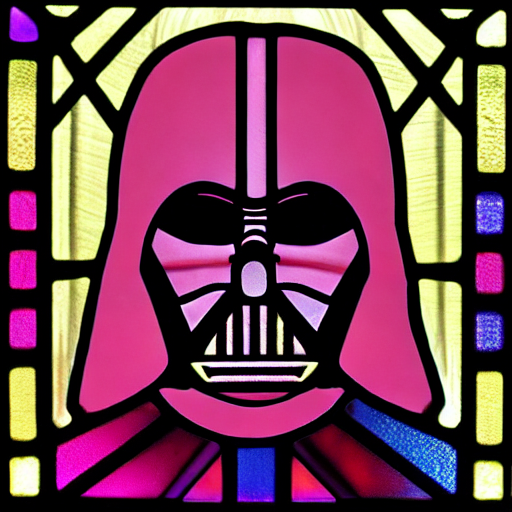

In [3]:
image = pipeline(
    "stained glass of darth vader, blacklight, centered composition, masterpiece, photorealistic, 8k").images[0]
image

# Popular models

The most common text-to-image models are Stable Diffusion V1.5, Stable Diffusion XL(SDXL), and Kandinsky2.2. There are also ControlNet models or adapters that can be udes with text-to-image models for more direct control in generating images. The results from each model are slightly different because of their architecture and training process, but no matter which model you chose, their usage is more or less the same. Let's use the same prompt for each model and compare their results.

# Stable Diffusion v1.5

Stable Diffusion v1.5 is a latent diffusion model initialized from Stable Diffusionv1.4, and finetuned for 595k steps on ` 512*512`  images from the LAION-Aesthetics V2 dataset V2 dataset. You can use this model like this:

In [4]:
import gc

del pipeline, image
gc.collect()

torch.cuda.empty_cache()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

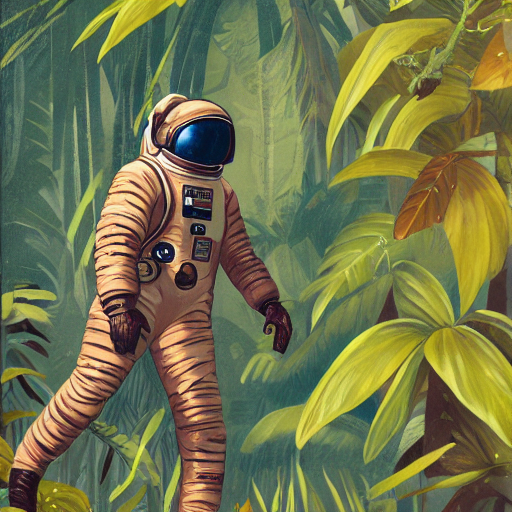

In [5]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", generator=generator).images[0]
image

# Stable Diffusion XL

SDXL is a much larger version of the previous Stable Diffusion models, and involves a two-stage model process that adds even more details to an image. It also includes some additional *micro-conditionings* to generate high-quality images centered subjects. Take a look at the more comprehensive SDXL guide to learn more about how to use it. In general, you can use SDXL like:

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

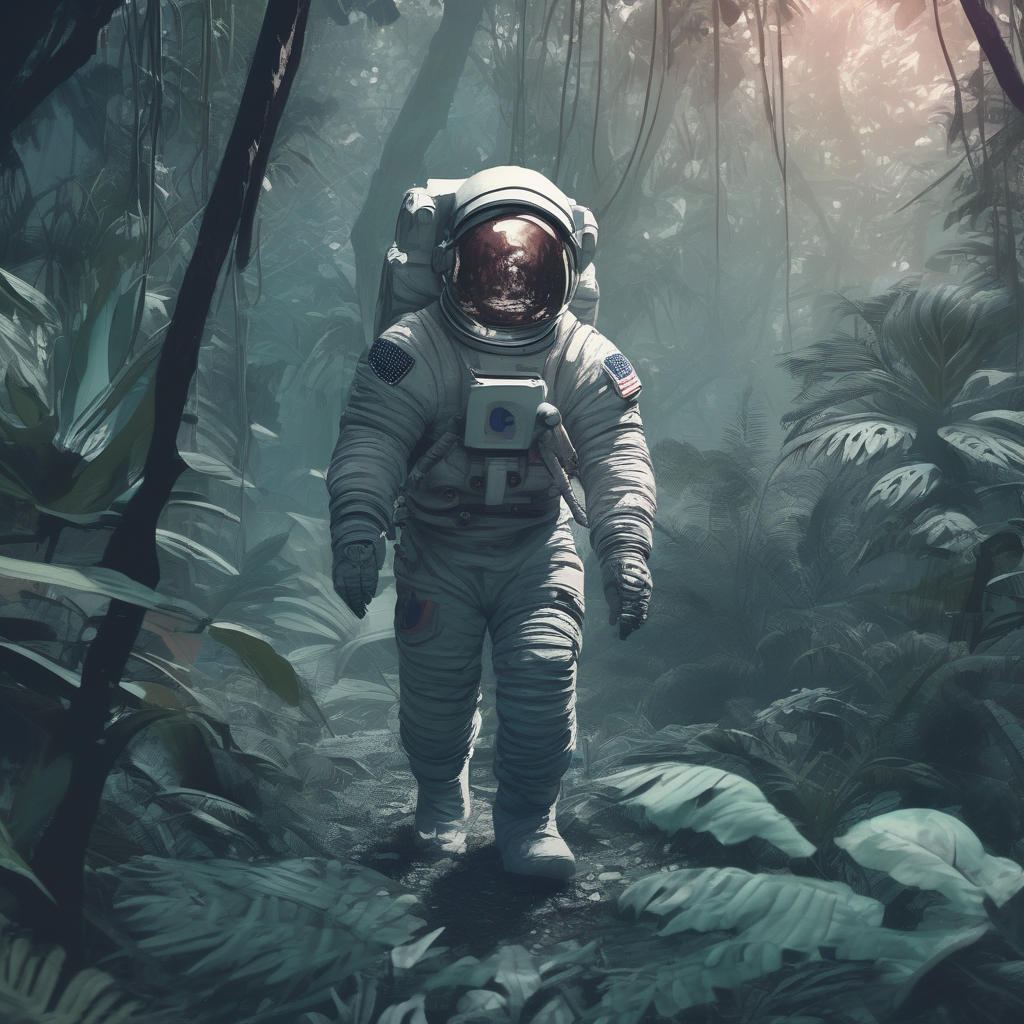

In [6]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16").to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", generator=generator).images[0]
image

# Kandinsky 2.2

The Kandisky model is a bit different from the Stable Diffusion models because it also usea an image prior model to create embeddings that are used to better align text and images in the diffusion model.

The easiest way to use Kandinsky 2.2 is:

In [7]:
import gc

del pipeline, image
gc.collect()

torch.cuda.empty_cache()

model_index.json:   0%|          | 0.00/250 [00:00<?, ?B/s]

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/271M [00:00<?, ?B/s]

movq/config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/317 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.01G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/501 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/3.69G [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.10G [00:00<?, ?B/s]

prior/config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

image_processor/preprocessor_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2.py:202: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/100 [00:00<?, ?it/s]

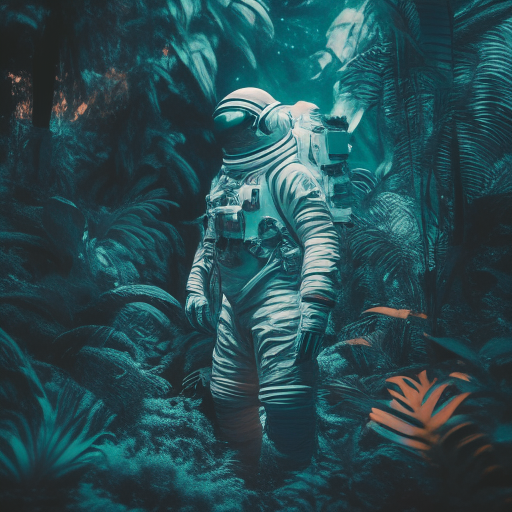

In [8]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16
).to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", generator=generator).images[0]
image

# ControlNet

ControlNet models are auxiliary models or adaptera that are finetuned on top of text-to-image models, such as Stable **Diffusion v1.5**. Using ControlNet models in combination with text-to-image models offers diverse options for more explicit control over how to generate an image. With ControlNet, you add an additional conditioning input image to the model.For example, if you provide an image of a human pose(usually represented as multiple keypoints that are connected into a skeleton) as a conditioning input, the model generates an image that follows the pose of the image. Check out the more in-depth **ControlNet** guide to learn more about other conditioning inputs and how to use them.

In this example,let's condition the ControlNet with a human pose estimation image. Load the ControlNet model pretrained on human pose estimations:

In [9]:
import gc

del pipeline, image
gc.collect()

torch.cuda.empty_cache()

In [10]:
from diffusers import ControlNetModel, AutoPipelineForText2Image
from diffusers.utils import load_image
import torch

controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/control_v11p_sd15_openpose", torch_dtype=torch.float16, variant="fp16").to("cuda")
pose_image = load_image("https://huggingface.co/lllyasviel/control_v11p_sd15_openpose/resolve/main/images/control.png")

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/723M [00:00<?, ?B/s]

Pass the controlnet to the **AutoPipelineForText2Image** , and provide the promptand pose estimation image:

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

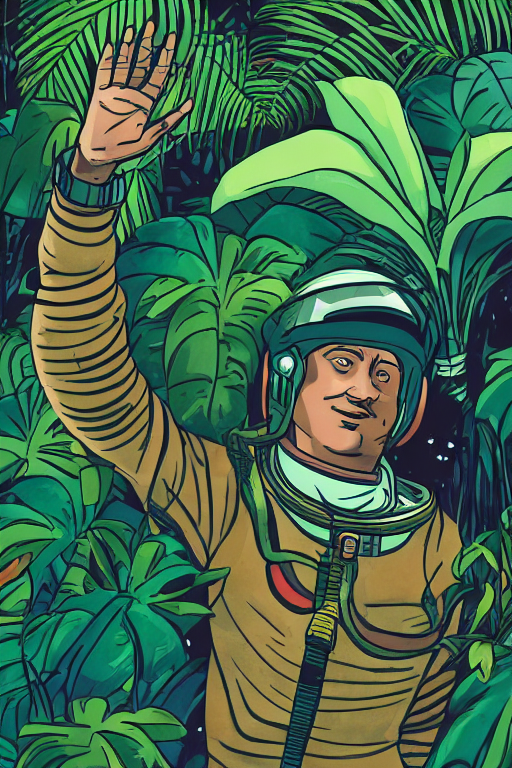

In [11]:
pipeline = AutoPipelineForText2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, variant="fp16").to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detained, 8k", image=pose_image, generator=generator).images[0]
image

# Configure pipeline parameters

There are a number of parameters that can be configured in the pipeline that affect how an image is generated. You can change the image's size, specify a negative prompt to improve image quality, and more. This section dives deeper into how to use those parameters.

# Height ans width

The height and width parameters control the height and width (in pixels) of the generated image. By defaut, the Stable Diffusion v1.5 model outputs `512*512` images, but youcan change this to any sixe that is a multiple of `8` . For example, to create a rectangular image:

In [12]:
import gc

del pipeline, image
gc.collect()

torch.cuda.empty_cache()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

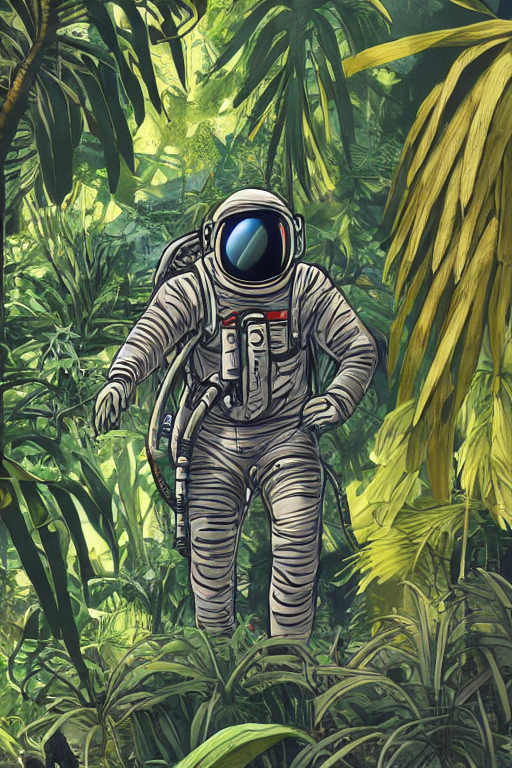

In [13]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to("cuda")
image = pipeline(
    "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", height=768, width=512).images[0]
image

Other models may have different default image sizes depending on the image sizes in the training dataset. For example, SDXL's default image size is `1024*1024` and using lower **height** and **width** values may result quality images. Make sure you check the model's API reference first!

# Guidance scale

The guidance_scale parameter affects how much the prompt infulences image generation. A lower value gives the model "creativity" to generate images that are more loosely related to the prompt. Higher guidance_scale values push the model to follow the promptmore closely, and if this value is too high, you may observe some artifacts in the generated image.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

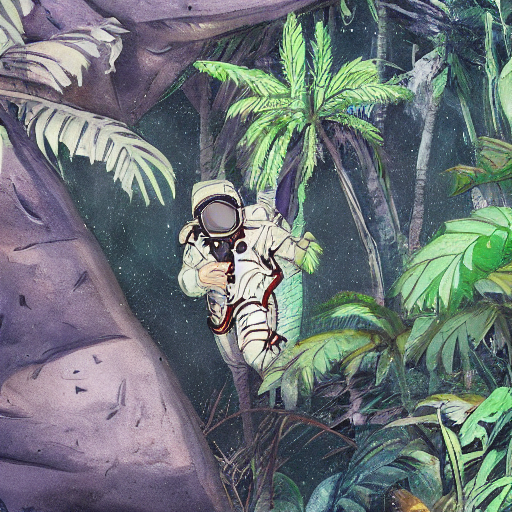

In [14]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to("cuda")
image = pipeline(
    "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",  guidance_scale=3.5).images[0]
image

# Negative prompt

Just like how a prompt guides generation, a **negative prompt** steers the model away from things you don't want the model to generate. This is commonly used to improve overall image quality by removing poor or bad image features such as "low resolution" or "bad details". You can also use a negative prompt to remove or modify the content and style of an image.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

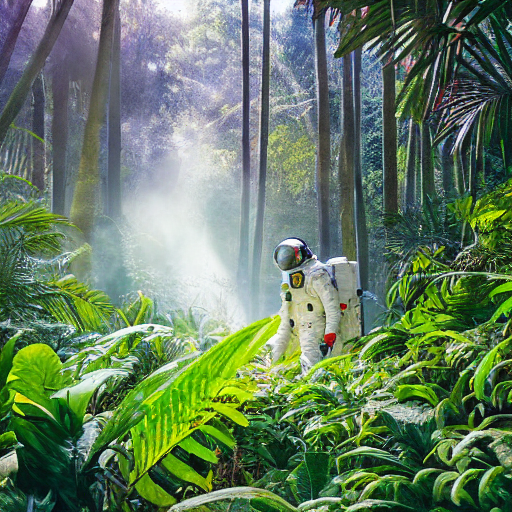

In [15]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to("cuda")
image = pipeline(
    "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",  
    negative_prompt="ugly, deformed, disfigured, poor details, bad anatomy",
).images[0]
image

# Generator

A **torch. Generator** object enables reproducibility in a pipeline by setting a manual seed. You can use a Generator to generate batches of images and iteratively improve on an image genarated from a seed as detailed in the **Improve image quality with deterministic generation guide**.

You can set a seed and generator as shown below. Creating an image with a Generators should return the same result each time instead of randomly generating a new image.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

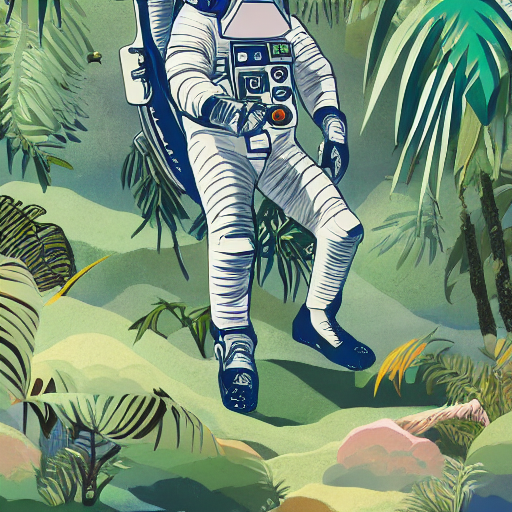

In [16]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to("cuda")
generator = torch.Generator(device="cuda").manual_seed(30)
image = pipeline(
    "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
    generator=generator,
).images[0]
image

# Control image generation

There are several ways to exert more control over how an image is generated outside of configuring a pipeline's parameters, such as prompt weighting and ControlNet models.

# Prompt weighting

Prompt weighting is a technique for increasing or decreasing the importance of concepts in a prompt to emphasize or minimize certain features in an image. We recommend using the **Compel** librart to help you generate the weighted prompt embeddings.

Learn how to create the prompt embeddings in the **Prompt weighting** guide. This example focuses on how to use the prompt embeddings in the pipeline.

Once you have created the embeddings, you can pass them to the **prompt_embeds** (and **negative_prompt_embeds** if you are using a negative prompt) parameter in the pipeline.

Credit: https://huggingface.co/docs/text-generation-inference/index